In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Extract Data
train_data = pd.read_csv('ridgetrain.txt', sep='  ',names=['input','output'],header=None)
test_data = pd.read_csv('ridgetest.txt',sep='  ',names=['input','output'],header=None)
print(train_data.shape)
print(type(train_data))
# print(test_data)/

(250, 2)
<class 'pandas.core.frame.DataFrame'>


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13012\3310313451.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv('ridgetrain.txt', sep='  ',names=['input','output'],header=None)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13012\3310313451.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv('ridgetest.txt',sep='  ',names=['input','output'],header=None)


In [3]:
train_x = np.array(train_data['input'])
train_y = np.array(train_data['output'])
test_x = np.array(test_data['input'])
test_y = np.array(test_data['output'])
print(type(train_x))

<class 'numpy.ndarray'>


In [4]:
def rbf_kernel(xn, xm, gamma):
    """
    Compute the Radial Basis Function (RBF) kernel between two vectors.

    Args:
        xn : First vector.
        xm : Second vector.
        gamma: Bandwidth parameter for the RBF kernel.
    """
    distance = np.linalg.norm(xn - xm)
    return np.exp(-gamma * (distance ** 2))

In [5]:
#Kernel Matrix

def compute_kernel_matrix(x_values,gamma):
    K_matrix = []
    for x_value_1 in x_values:
        K_row = []
        for x_value_2 in x_values:
            kernel_score = rbf_kernel(x_value_1,x_value_2,gamma)
            K_row.append(kernel_score)
        K_matrix.append(K_row)
    return K_matrix
        

Calculating $\alpha$ using $ \alpha = (K + \lambda I_N)^{-1}y $

In [6]:
# Find alpha_value
def compute_alpha(k_matrix,lambda_value,train_y):
    # Add lambda to the diagonal of K
    k_matrix_size = k_matrix.shape[0]
    
    # Compute the inverse of K + lambda*I
    K_plus_lambda_I = k_matrix + lambda_value*np.eye(k_matrix_size)

    #Compute alpha value which is (K + lambda*I)-1*y
    alpha_vector = np.dot(np.linalg.inv(K_plus_lambda_I),train_y)
    return alpha_vector



In [7]:
def kernelized_prediction(alpha_vector,train_x,test_x,gamma_value):
    predicted_y_values = []
    for test_x_value in test_x:
        predicted_y = 0
        for i,train_x_value in enumerate(train_x):
            kernel_similarity_testX_trainX =  rbf_kernel(train_x_value,test_x_value,gamma_value)
            predicted_y = predicted_y + alpha_vector[i]*kernel_similarity_testX_trainX
        predicted_y_values.append(predicted_y)
    return predicted_y_values
    

In [8]:
def calculate_rmse(true_values, predicted_values):
    n = len(true_values)
    rmse = np.sqrt(np.sum((true_values - predicted_values)**2) / n)
    return rmse

Find predicted_y using $y_{} = \sum_{i=1}^{n} \alpha_{i} k(x_{},x_{i})$

In [9]:
gamma_value = 0.1
lambda_value = 0.1
k_matrix = np.array(compute_kernel_matrix(train_x,gamma_value))
alpha_vector = compute_alpha(k_matrix,lambda_value,train_y)
kernelized_predicted_y = kernelized_prediction(alpha_vector,train_x,test_x,gamma_value)
rmse_score = calculate_rmse(test_y,kernelized_predicted_y)
print("RMSE_Score with Lambda {} = {}".format(lambda_value,rmse_score))
# print(kernelized_predicted_y)

RMSE_Score with Lambda 0.1 = 0.03257767029357466


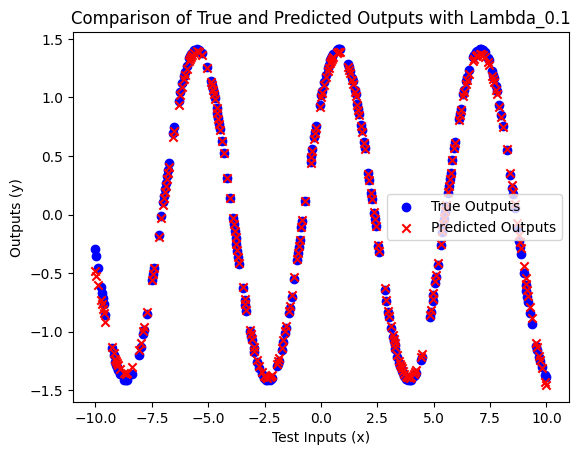

In [10]:
# Scatter Plot for models_predicted_y and true_y
plt.scatter(test_x, test_y, color='blue', label='True Outputs', marker='o')
plt.scatter(test_x, kernelized_predicted_y, color='red', label='Predicted Outputs', marker='x')
plt.xlabel('Test Inputs (x)')
plt.ylabel('Outputs (y)')
plt.title('Comparison of True and Predicted Outputs with Lambda_0.1')
plt.legend()
plt.show()

RMSE_Score with Lambda 0.1 = 0.03257767029357466
RMSE_Score with Lambda 1 = 0.17030390344202526
RMSE_Score with Lambda 10 = 0.6092671596540067
RMSE_Score with Lambda 100 = 0.9110858052767243


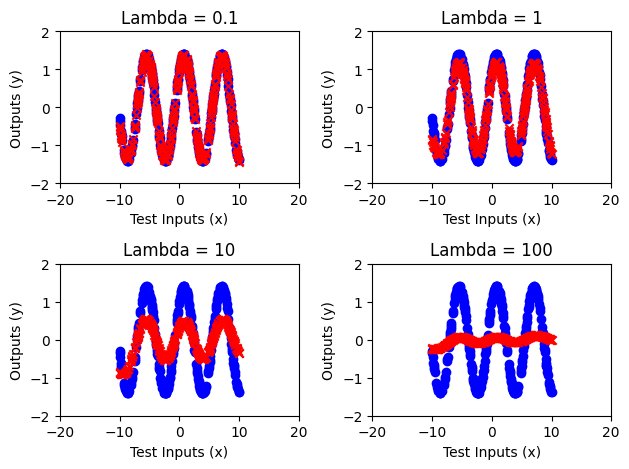

In [11]:
lambda_values = [0.1, 1, 10, 100]

for i,lambda_value in enumerate(lambda_values):
    gamma_value = 0.1
    k_matrix = np.array(compute_kernel_matrix(train_x,gamma_value))
    alpha_vector = compute_alpha(k_matrix,lambda_value,train_y)
    kernelized_predicted_y = kernelized_prediction(alpha_vector,train_x,test_x,gamma_value)
    
    rmse_score = calculate_rmse(test_y,kernelized_predicted_y)
    print("RMSE_Score with Lambda {} = {}".format(lambda_value,rmse_score))
    
    plt.subplot(2,2,i+1)
    plt.xlim(-20, 20)
    plt.ylim(-2, 2)
    plt.scatter(test_x, test_y, color='blue', label='True Outputs', marker='o')
    plt.scatter(test_x, kernelized_predicted_y, color='red', label='Predicted Outputs', marker='x')
    plt.xlabel('Test Inputs (x)')
    plt.ylabel('Outputs (y)')
    plt.title(f'Lambda = {lambda_value}')

# Adjust layout
plt.tight_layout()
plt.legend()
# Show plot
plt.show()